In [1]:
import pandas as pd
# Specifica il percorso del file Excel
file_path = "fide_stats.xltx"

# Leggi il file Excel e crea un DataFrame
df = pd.read_excel(file_path)


C:\Users\Antonio\AppData\Local\Temp\ipykernel_3080\3171186814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
counts_per_fed = df['Fed'].value_counts()

# Crea una tupla per ogni 'Fed' e il conteggio corrispondente
tupla_fed_conteggio = [(fed, conteggio) for fed, conteggio in counts_per_fed.items()]

# Ora puoi utilizzare tupla_fed_conteggio per visualizzare i conteggi per ogni 'Fed' comune
tupla_fed_conteggio

[('RUS', 39639),
 ('IND', 39468),
 ('GER', 30549),
 ('ESP', 30495),
 ('FRA', 29311),
 ('IRI', 13352),
 ('POL', 13289),
 ('ITA', 13069),
 ('TUR', 9838),
 ('USA', 9200),
 ('CZE', 9159),
 ('HUN', 7046),
 ('BRA', 6716),
 ('GRE', 6673),
 ('ARG', 6529),
 ('SRB', 6052),
 ('ROU', 5496),
 ('NED', 5464),
 ('UKR', 5191),
 ('DEN', 4828),
 ('SWE', 4721),
 ('ENG', 4506),
 ('SVK', 4497),
 ('AUT', 4328),
 ('SRI', 4320),
 ('NOR', 4236),
 ('BEL', 4167),
 ('PER', 3941),
 ('CRO', 3930),
 ('COL', 3765),
 ('KAZ', 3536),
 ('MEX', 3468),
 ('ISR', 3351),
 ('AUS', 3324),
 ('SUI', 3177),
 ('EGY', 2977),
 ('VEN', 2870),
 ('CHI', 2741),
 ('CUB', 2511),
 ('POR', 2495),
 ('CAN', 2454),
 ('MAS', 2395),
 ('AZE', 2362),
 ('BAN', 2301),
 ('BUL', 2166),
 ('CHN', 2137),
 ('PHI', 1916),
 ('RSA', 1808),
 ('SLO', 1660),
 ('ECU', 1578),
 ('ARM', 1558),
 ('BOL', 1551),
 ('GEO', 1493),
 ('UZB', 1356),
 ('BLR', 1309),
 ('LTU', 1296),
 ('FIN', 1243),
 ('NEP', 1144),
 ('INA', 1126),
 ('VIE', 1122),
 ('BIH', 1059),
 ('IRQ', 999),
 

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\Antonio\AppData\Local\Temp\ipykernel_3080\3053383444.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Antonio\AppData\Local\Temp\ipykernel_3080\3053383444.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world['percentuale_popolazione'].fillna(0, inplace=True)
C:

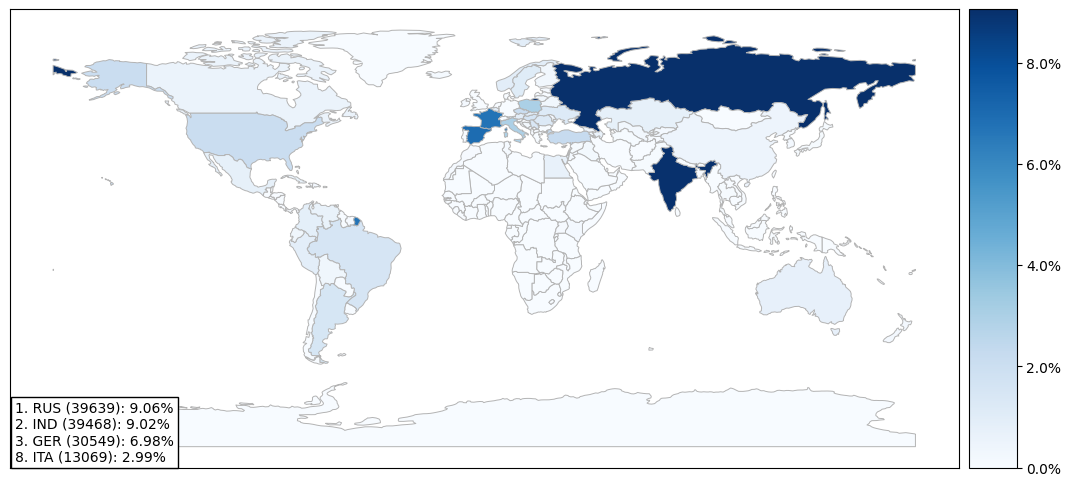

In [60]:
# Calcolo delle percentuali di popolazione per i paesi
total_counts = sum(count for _, count in tupla_fed_conteggio)
percentuali_popolazione = {country: count / total_counts for country, count in tupla_fed_conteggio}

# Caricamento del dataset dei confini dei paesi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mappatura delle percentuali di popolazione dei paesi
world['percentuale_popolazione'] = world['iso_a3'].map(percentuali_popolazione)
world['percentuale_popolazione'].fillna(0, inplace=True)

# Creazione della figura e dell'asse
fig, ax = plt.subplots(figsize=(13, 8))

# Creazione dell'asse per la barra dei colori
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Tracciamento della barra dei colori sull'asse principale e disegno della mappa
world.plot(column='percentuale_popolazione', cmap='Blues', legend=True, ax=ax, cax=cax, linewidth=0.7,edgecolor='0.7')
ax.set_xticks([])  # Rimuove gli indici sull'asse x
ax.set_yticks([])  # Rimuove gli indici sull'asse y

# Ottieni gli indici della barra dei colori
ticks = cax.get_yticks()

# Calcola le percentuali corrispondenti agli indici
percentuali = [f'{tick * 100:.1f}%' for tick in ticks]
cax.set_yticklabels(percentuali)
# Calcolo dei primi tre stati con il total count più alto
top_states = sorted(tupla_fed_conteggio, key=lambda x: x[1], reverse=True)[:3]

# Aggiunta della legenda per i tre stati con rank più alto
legend_text = []
for i, (country, count) in enumerate(top_states):
    legend_text.append(f'{i+1}. {country} ({count}): {percentuali_popolazione[country]*100:.2f}%')

legend_text.append(f'{8}. ITA (13069): {percentuali_popolazione["ITA"]*100:.2f}%')

#Disposizione testo
legend_string = '\n'.join(legend_text)
# Disposizione del testo della legenda in un riquadro
spostamento_verticale = 0.1  # interlinea
y_start = 0.02  # Coordinata y iniziale della prima riga della legenda
ax.annotate(legend_string, xy=(0.005, 0.015), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', alpha=1))
# Visualizzazione della mappa
plt.show()

In [51]:
valore_associato = None
for chiave, valore in tupla_fed_conteggio:
    if chiave == 'ITA':
        valore_associato = valore
        break

if valore_associato is not None:
    print(f"Il valore associato è {valore_associato}")
else:
    print("Chiave non trovata nella tupla")


Il valore associato è 13069
